In [1]:
# %load np_load_allow_pickle_True.py
import numpy as np 
np_load_old = np.load
np.load = lambda *a, **k: np_load_old(*a, allow_pickle=True, **k)

# np.load 사용 후 반드시 아래 코드를 실행할 것!!!
# np.load = np_load_old

In [2]:
from keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = \
    imdb.load_data(num_words=10000)

Using TensorFlow backend.


In [3]:
np.load = np_load_old

In [4]:
train_data.shape

(25000,)

In [5]:
type(train_data[0])

list

In [6]:
len(train_data[0])

218

In [7]:
len(train_data[1])

189

In [8]:
print(train_data[0])

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]


In [9]:
def vectorize_sequences(sequences, dimension=10000):
    # 크기가 (len(sequences), dimension))이고 모든 원소가 0인 행렬을 만듭니다
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # results[i]에서 특정 인덱스의 위치를 1로 만듭니다
    return results

# 훈련 데이터를 벡터로 변환합니다
x_train = vectorize_sequences(train_data)
# 테스트 데이터를 벡터로 변환합니다
x_test = vectorize_sequences(test_data)

In [10]:
print(x_train.shape)
print(x_test.shape)

(25000, 10000)
(25000, 10000)


In [11]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [12]:
# 레이블을 벡터로 바꿉니다
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [13]:
print(y_train.shape)
print(y_test.shape)

(25000,)
(25000,)


In [14]:
from keras import models
from keras import layers

model = models.Sequential()
# model.add(layers.Dense(16, activation='relu', input_dim=10000))
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

W0718 14:37:11.590650  4848 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0718 14:37:11.605653  4848 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0718 14:37:11.608647  4848 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [15]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

W0718 14:37:11.647647  4848 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\deeplearning\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0718 14:37:11.666676  4848 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:3376: The name tf.log is deprecated. Please use tf.math.log instead.

W0718 14:37:11.670675  4848 deprecation.py:323] From C:\Users\user\Anaconda3\envs\deeplearning\lib\site-packages\tensorflow\python\ops\nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [16]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [17]:
partial_x_train.shape

(15000, 10000)

In [18]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

W0718 14:37:11.878614  4848 deprecation_wrapper.py:119] From C:\Users\user\Anaconda3\envs\deeplearning\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 2s 159us/step - loss: 0.5612 - acc: 0.7579 - val_loss: 0.4055 - val_acc: 0.8556
Epoch 2/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.2999 - acc: 0.9001 - val_loss: 0.2932 - val_acc: 0.8877
Epoch 3/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.1970 - acc: 0.9336 - val_loss: 0.2769 - val_acc: 0.8896
Epoch 4/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.1429 - acc: 0.9533 - val_loss: 0.2877 - val_acc: 0.8869
Epoch 5/20
15000/15000 [==============================] - 2s 130us/step - loss: 0.1062 - acc: 0.9693 - val_loss: 0.3051 - val_acc: 0.8838
Epoch 6/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.0785 - acc: 0.9804 - val_loss: 0.3303 - val_acc: 0.8826
Epoch 7/20
15000/15000 [==============================] - 2s 131us/step - loss: 0.0576 - acc: 0.9891 - val_loss: 0.3592 - 

In [19]:
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline

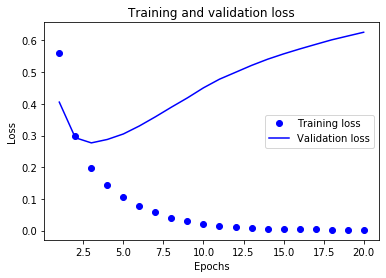

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
# ‘bo’는 파란색 점을 의미합니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# ‘b’는 파란색 실선을 의미합니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend();

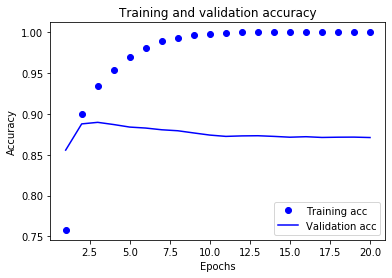

In [22]:
plt.clf()   # 그래프를 초기화합니다
acc = history_dict['acc']
val_acc = history_dict['val_acc']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend();

In [23]:
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [24]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [25]:
model.fit(x_train, y_train,
          epochs=4, batch_size=512)

Epoch 1/4
25000/25000 [==============================] - 2s 92us/step - loss: 0.5160 - acc: 0.8014
Epoch 2/4
25000/25000 [==============================] - 2s 84us/step - loss: 0.2675 - acc: 0.9061
Epoch 3/4
25000/25000 [==============================] - 2s 84us/step - loss: 0.1917 - acc: 0.9320
Epoch 4/4
25000/25000 [==============================] - 2s 85us/step - loss: 0.1530 - acc: 0.9477


In [26]:
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 3s 106us/step


In [27]:
results

[0.3031096349334717, 0.88284]

In [28]:
model.predict(x_test)

array([[0.21311864],
       [0.99996907],
       [0.76502144],
       ...,
       [0.0902071 ],
       [0.06554189],
       [0.7227244 ]], dtype=float32)